In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



%matplotlib inline

random_state = 42

POINT 1

In [2]:
df = pd.read_csv('exam_2021_01_27.csv',header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


In [3]:
df.describe()

,0,1,3,4
count,141.000000,140.000000,137.000000,150.000000
mean,5.897872,3.036429,1.290511,1.000000
std,0.820232,0.437654,0.733934,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.200000,2.800000,0.400000,0.000000
50%,5.800000,3.000000,1.400000,1.000000
75%,6.400000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


In [4]:
df.shape

(150, 5)

POINT 2

In [5]:
df = df.dropna()
df.shape

(122, 5)

POINT 3

In [6]:
from sklearn.preprocessing import OrdinalEncoder
focus = [2] # list of ordinal attributes
transf_dtype = np.int32 # type to be used when converting


ordinal_transformer = OrdinalEncoder(dtype = transf_dtype) # we assume the values are encoded so that lexicographic order = intended order
df_2 = df.copy()
df_2[focus] = ordinal_transformer.fit_transform(df[focus])
df_2.head() #just to check

,0,1,2,3,4
4,5.0,3.6,0,0.2,0
7,5.0,3.4,0,0.2,0
10,5.4,3.7,0,0.2,0
11,4.8,3.4,0,0.2,0
13,4.3,3.0,0,0.1,0


POINT 4

In [10]:
from sklearn.model_selection import train_test_split
target = 4
X = df_2.drop(target, axis = 1)
y = df_2[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = random_state)

POINT 5/6

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
score = 'accuracy'
cv = 5 #number of split for cross validation
model1_param = {'criterion':['gini', 'entropy'], 'max_depth':list(range(1,10)), 'min_samples_split': range(2,10)}
model1_est = DecisionTreeClassifier(random_state=random_state)


model1 = GridSearchCV(model1_est, model1_param, scoring=score, cv=5) 
model1.fit(X_train,y_train)

print("The best found hyperparameters are: {}".format(model1.best_params_))


The best found hyperparameters are: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


POINT 7

The accuracy on test set is 87.10%


C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


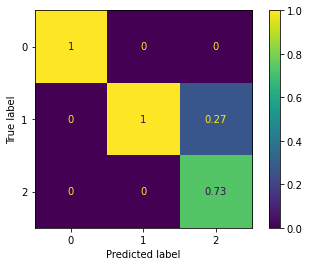

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

y_pred = model1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("The accuracy on test set is {:.2f}%".format(acc*100))
plot_confusion_matrix(model1, X_test, y_test, normalize='pred');

POINT 8/9

In [19]:
score = 'accuracy'
cv = 5 #number of split for cross validation
model2_param = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
model2_est = KNeighborsClassifier()


model2 = GridSearchCV(model2_est, model2_param, scoring=score, cv=5) 
model2.fit(X_train,y_train)

print("The best found hyperparameters are: {}".format(model2.best_params_))

The best found hyperparameters are: {'n_neighbors': 1}


The accuracy on test set is 87.10%


C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


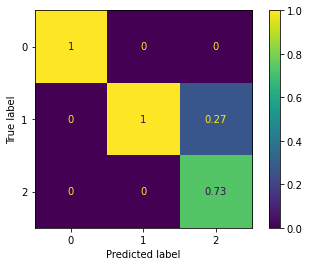

In [20]:
y_pred = model2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("The accuracy on test set is {:.2f}%".format(acc*100))
plot_confusion_matrix(model1, X_test, y_test, normalize='pred');